In [1]:
import pandas as pd


In [3]:
data = pd.read_csv("salesdata.csv")

In [4]:
data.head(15)

,Order Date,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,03-01-2014,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55
1,04-01-2014,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
2,04-01-2014,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
3,04-01-2014,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
4,05-01-2014,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88
5,06-01-2014,Lycoris Saunders,California,Office Supplies,Paper,Xerox 225,19.44,3,9.33
6,06-01-2014,Jack O'Briant,Georgia,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.78,3,5.24
7,06-01-2014,Maria Etezadi,Kentucky,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.82,9,746.41
8,06-01-2014,Maria Etezadi,Kentucky,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,609.98,2,274.49
9,06-01-2014,Maria Etezadi,Kentucky,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.48,2,1.48


In [6]:
data.isnull().sum()


Order Date       0
Customer Name    0
State            0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')


In [8]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


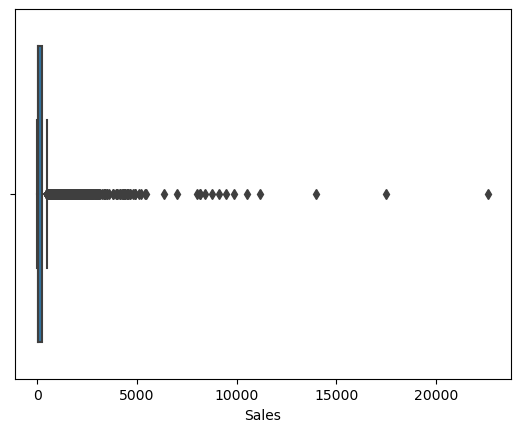

In [11]:
# Plot boxplot to detect outliers
sns.boxplot(data['Sales'])
plt.show()

In [12]:
negative_profits = data[data['Profit'] < 0]


In [13]:
data.describe()


,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858022,3.789574,28.656973
std,623.245131,2.225110,234.260203
min,0.440000,1.000000,-6599.980000
25%,17.280000,2.000000,1.730000
50%,54.490000,3.000000,8.665000
75%,209.940000,5.000000,29.360000
max,22638.480000,14.000000,8399.980000


In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)

In [16]:
# Calculate the IQR
IQR = Q3 - Q1

In [17]:
# Define the threshold for outliers (typically 1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Filter out the outliers
data_cleaned = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

print(data_cleaned)

     Order Date      Customer Name         State         Category  \
0    2014-01-03      Darren Powers         Texas  Office Supplies   
1    2014-01-04      Phillina Ober      Illinois  Office Supplies   
2    2014-01-04      Phillina Ober      Illinois  Office Supplies   
3    2014-01-04      Phillina Ober      Illinois  Office Supplies   
4    2014-01-05         Mick Brown  Pennsylvania  Office Supplies   
...         ...                ...           ...              ...   
9989 2017-12-30  Patrick O'Donnell      New York       Technology   
9990 2017-12-30  Patrick O'Donnell      New York  Office Supplies   
9991 2017-12-30         Erica Bern    California  Office Supplies   
9992 2017-12-30         Erica Bern    California  Office Supplies   
9993 2017-12-30      Jill Matthias      Colorado  Office Supplies   

     Sub-Category                                       Product Name   Sales  \
0           Paper  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.45   
1          

In [20]:
data_cleaned.describe()


,Sales,Quantity,Profit
count,8827.000000,8827.000000,8827.000000
mean,92.864865,3.608587,11.198706
std,114.045160,2.129308,49.066185
min,0.440000,1.000000,-1181.280000
25%,15.010000,2.000000,1.700000
50%,40.880000,3.000000,7.440000
75%,124.225000,5.000000,21.335000
max,498.260000,14.000000,240.860000


In [21]:
data_cleaned.to_csv('cleaned_data.csv', index=False)
